# Deluty (1976) model equation

[*********************100%***********************]  1 of 1 completed


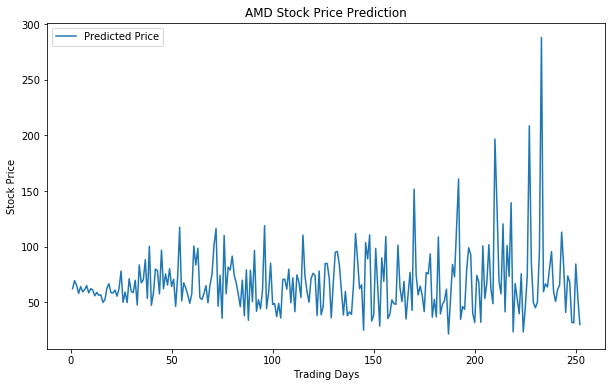

In [6]:
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Input
symbol = 'AMD'
start = '2020-01-01'
end = '2023-01-01'

# Read data
dataset = yf.download(symbol, start, end)

# Prepare data
data = dataset['Adj Close']

# Calculate the average daily return and daily volatility
returns = np.log(data / data.shift(1))[1:]
mu = returns.mean() * 252  # Annualize the mean
sigma = returns.std() * np.sqrt(252)  # Annualize the standard deviation

# Define the time period for prediction (in trading days)
t = 252  # 1 year, assuming 252 trading days

# Initial stock price
P0 = data[-1]

# Generate a Wiener process (random fluctuations)
W = np.random.normal(0, 1, t)

# Use the Deluty (1976) equation to predict future stock prices
t_values = np.arange(1, t + 1)
P_t = P0 * np.exp((mu - 0.5 * sigma ** 2) * t_values / 252 + sigma * np.sqrt(t_values / 252) * W)

# Plot the predicted stock prices
plt.figure(figsize=(10, 6))
plt.plot(t_values, P_t, label='Predicted Price')
plt.xlabel('Trading Days')
plt.ylabel('Stock Price')
plt.title(f'{symbol} Stock Price Prediction')
plt.legend()
plt.show()